In [19]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image chargée avec succès.


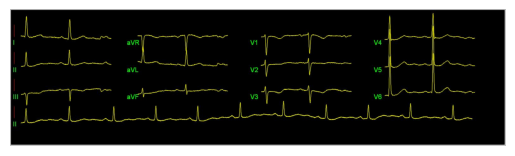

In [20]:
from google.colab import drive
import os


# Monter Google Drive
drive.mount('/content/drive')

# Vérifiez que le fichier existe
path = "/content/drive/MyDrive/Data_Apnea/classe1/Apn2.JPG"
if not os.path.isfile(path):
    raise FileNotFoundError(f"L'image à l'emplacement '{path}' n'a pas pu être trouvée. Vérifiez le chemin du fichier.")

# Chargement de l'image
ecg = cv.imread(path)

# Vérifiez si l'image a été correctement chargée
if ecg is None:
    raise FileNotFoundError(f"L'image à l'emplacement '{path}' n'a pas pu être chargée. Vérifiez le chemin du fichier.")
else:
    print("Image chargée avec succès.")



# Convertir l'image de BGR à RGB
ecg = cv.cvtColor(ecg, cv.COLOR_BGR2RGB)

# Affichage de l'image
plt.imshow(ecg)
plt.axis('off')  # Pour masquer les axes
plt.show()

In [21]:
ecg.shape

(432, 1566, 3)

In [22]:
# Chemin vers le répertoire contenant les images
dir_path = "/content/drive/MyDrive/Data_Apnea/classe1"

# Liste des fichiers d'images dans le répertoire
image_files = [f for f in os.listdir(dir_path) if f.endswith('.JPG') or f.endswith('.jpg')]

# Afficher quelques informations sur les images
print(f"Nombre total d'images: {len(image_files)}")

# Fonction pour afficher une image
def display_image(image_path):
    image = cv.imread(image_path)
    if image is None:
        print(f"L'image à l'emplacement '{image_path}' n'a pas pu être chargée.")
        return
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

Nombre total d'images: 13


Affichage de l'image 1: Apn1.JPG


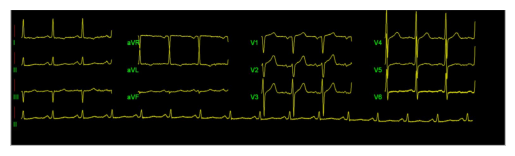

Affichage de l'image 2: Apn2.JPG


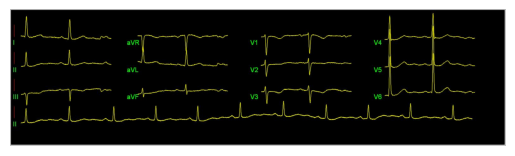

Affichage de l'image 3: Apn3.JPG


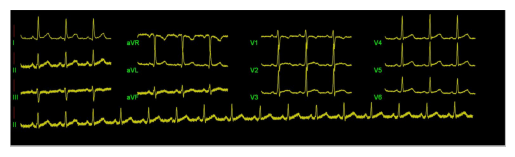

Affichage de l'image 4: Apn4.JPG


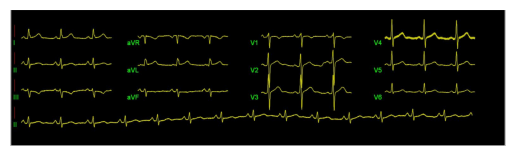

Affichage de l'image 5: Apn5.JPG


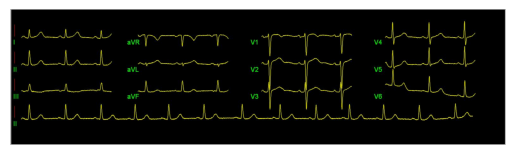

Affichage de l'image 6: Apn6.JPG


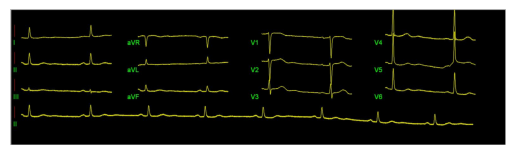

Affichage de l'image 7: Apn7.JPG


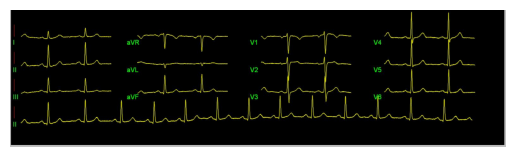

Affichage de l'image 8: Apn8.JPG


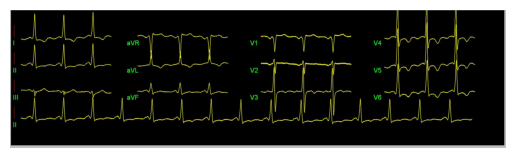

Affichage de l'image 9: Apn9.JPG


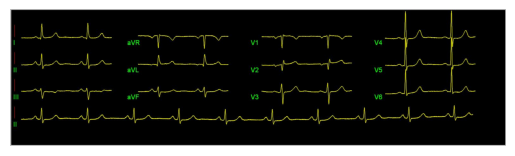

Affichage de l'image 10: Apn10.JPG


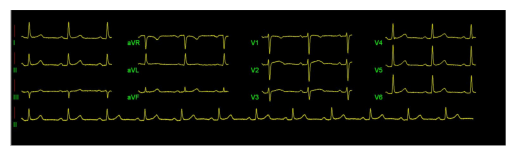

Affichage de l'image 11: Apn11.JPG


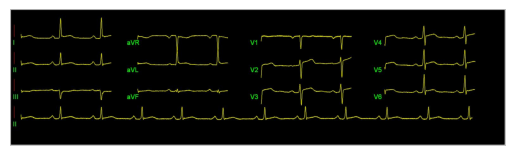

Affichage de l'image 12: Apn12.JPG


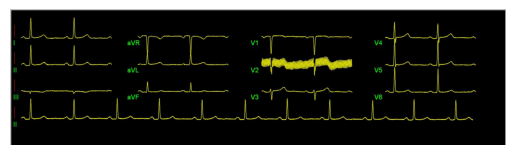

Affichage de l'image 13: Apn13.JPG


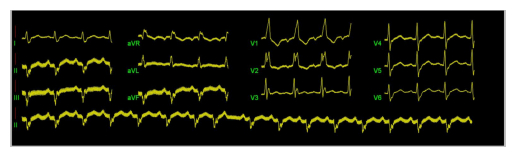

In [23]:
for i, image_file in enumerate(image_files[:13]):  # Afficher les 5 premières images
    image_path = os.path.join(dir_path, image_file)
    print(f"Affichage de l'image {i+1}: {image_file}")
    display_image(image_path)

Hauteur moyenne des images: 431.53846153846155
Largeur moyenne des images: 1566.1538461538462


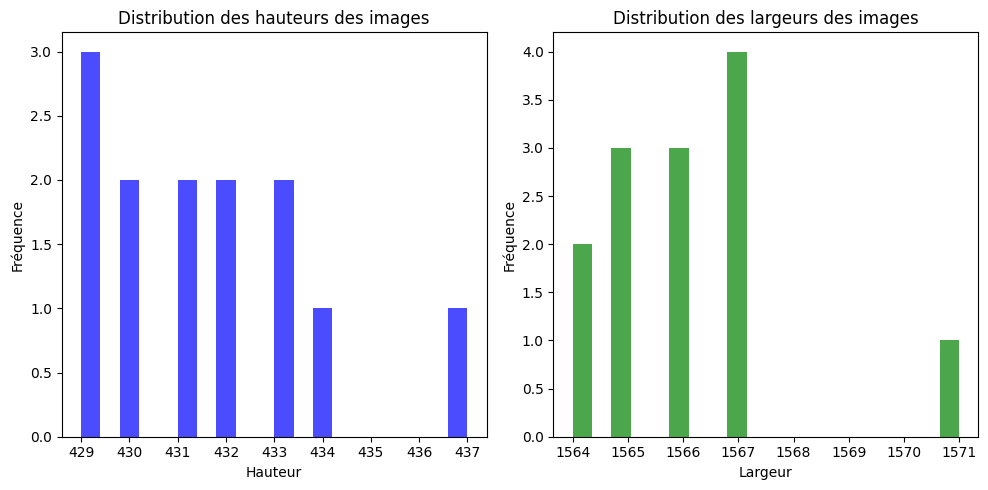

In [24]:
def get_image_info(image_path):
    image = cv.imread(image_path)
    if image is None:
        return None
    height, width, channels = image.shape
    return {
        "path": image_path,
        "height": height,
        "width": width,
        "channels": channels
    }

# Extraire les informations des images
image_info_list = [get_image_info(os.path.join(dir_path, img)) for img in image_files if get_image_info(os.path.join(dir_path, img)) is not None]

# Afficher quelques statistiques de base
heights = [info["height"] for info in image_info_list]
widths = [info["width"] for info in image_info_list]

print(f"Hauteur moyenne des images: {np.mean(heights)}")
print(f"Largeur moyenne des images: {np.mean(widths)}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(heights, bins=20, color='blue', alpha=0.7)
plt.title('Distribution des hauteurs des images')
plt.xlabel('Hauteur')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
plt.hist(widths, bins=20, color='green', alpha=0.7)
plt.title('Distribution des largeurs des images')
plt.xlabel('Largeur')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


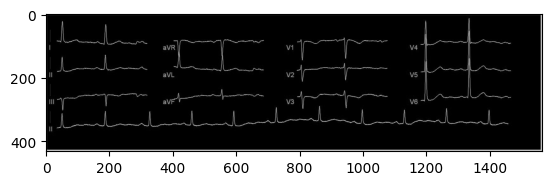

In [25]:
gray = cv.cvtColor(ecg, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray");

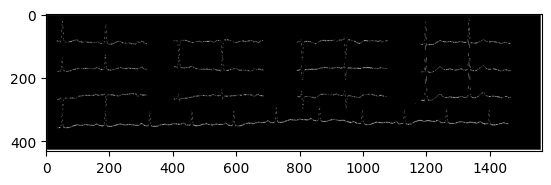

In [26]:
ret,th=cv.threshold(gray,180,255,cv.THRESH_BINARY)
plt.imshow(th, cmap="gray");

In [27]:
def get_derivations(image):

  ligne1 = image[0:35, :]
  ligne2 = image[40:80, :]
  ligne3 = image[80:120, :]

  # Initialiser le dictionnaire de dérivations
  derivations = {}

  derivations["lead_1"] = ligne1[:, 0:60]
  derivations["lead_avr"] = ligne1[:, 70: 130]
  derivations["lead_v1"] = ligne1[:, 140: 200]
  derivations["lead_v4"] = ligne1[:, 205: 260]

  derivations["lead_2"] = ligne2[:, 0:60]
  derivations["lead_avl"] = ligne2[:, 70:130]
  derivations["lead_v2"] = ligne2[:, 140:200]
  derivations["lead_v5"] = ligne2[:, 205:260]

  derivations["lead_3"] = ligne3[:, 0:60]
  derivations["lead_avf"] = ligne3[:, 70:130]
  derivations["lead_v3"] = ligne3[:, 140:200]
  derivations["lead_v6"] = ligne3[:, 205:260]

  return derivations

In [28]:
derivations = get_derivations(th)

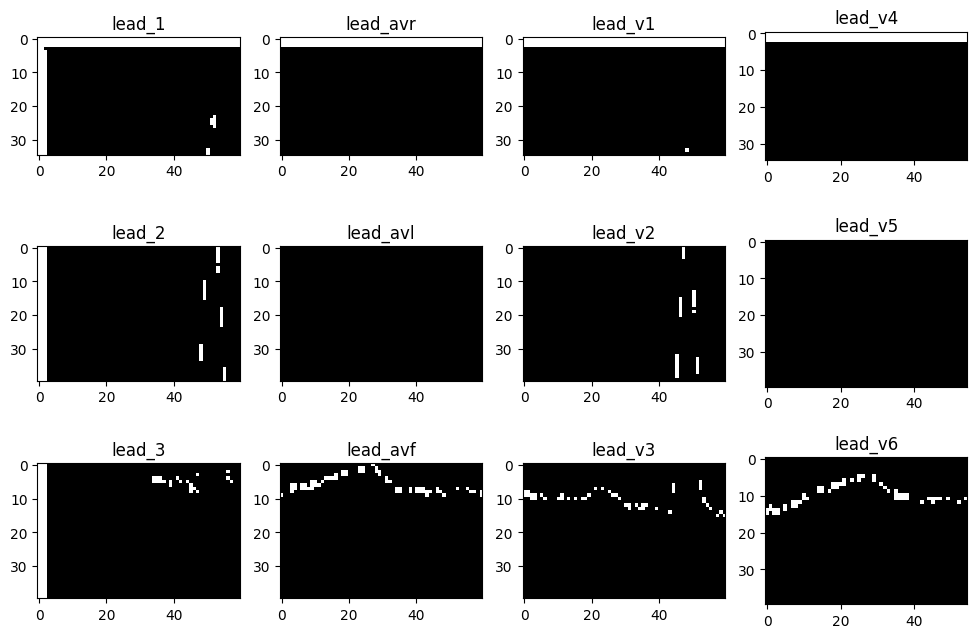

In [37]:
# Créer un sous-plot de 3 lignes et 4 colonnes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

for i, (name, derivation) in enumerate(derivations.items()):
  row = i // 4
  col = i % 4

  ax = axes[row][col]

  ax.imshow(derivation, cmap="gray")

  ax.set_title(name)

plt.show();

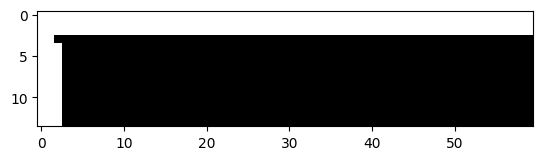

In [38]:
# Récupérer la première dérivation à partir de l'image
first_derivation = derivations["lead_1"]

# Afficher la première dérivation
plt.imshow(first_derivation[0:14, :], cmap="gray")

# Afficher le plot
plt.show();

In [39]:
def get_vector(lead):

  lead_sup = lead[14:, :]
  lead_inf = lead[0:14:, :]


  lead_inf_sum_col = [ sum(x) for x in zip(*lead_inf) ]
  lead_sup_sum_col = [ sum(x) for x in zip(*lead_sup) ]

  neg_lead = [element * -1 for element in lead_inf_sum_col]
  original = np.vstack((lead_sup_sum_col, neg_lead))

  final = [ sum(x) for x in zip(*original) ]
  return final

In [40]:

def get_vectors(derivations):
  vectors = {}
  for name, derivation in derivations.items():
    vector = get_vector(derivation)
    vectors[name] = vector
  return vectors

In [41]:
vectors = get_vectors(derivations)

In [42]:
def plot_data(data, title_prefix, nrows, ncols):

  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 8))

  for i, (name, element) in enumerate(data.items()):

    row = i // ncols
    col = i % ncols
    ax = axes[row][col]

    if isinstance(element, np.ndarray):
      ax.imshow(element, cmap="gray")
    else:
      ax.plot(element)

    ax.set_title(f"{title_prefix} {name}")

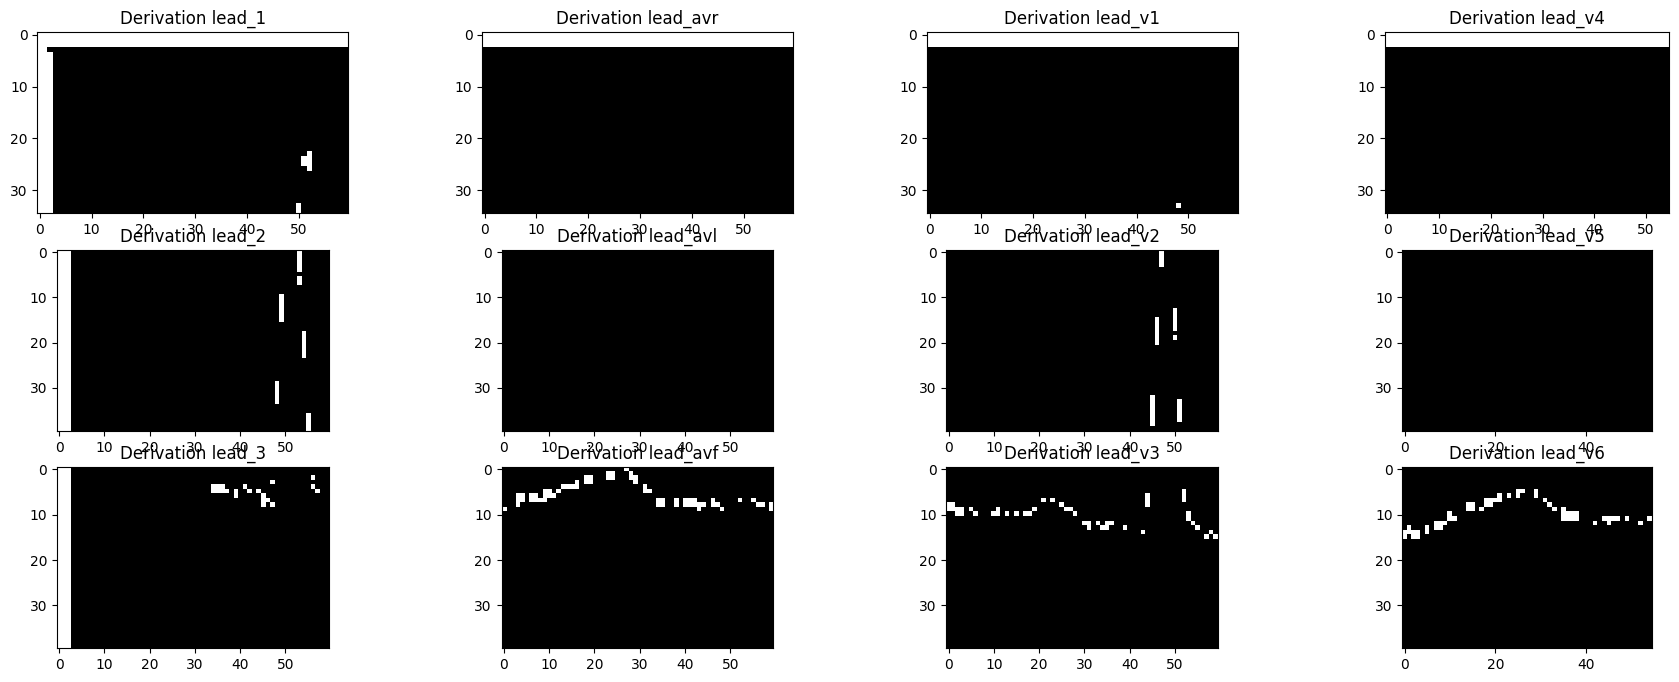

In [43]:
plot_data(derivations, "Derivation", 3, 4);

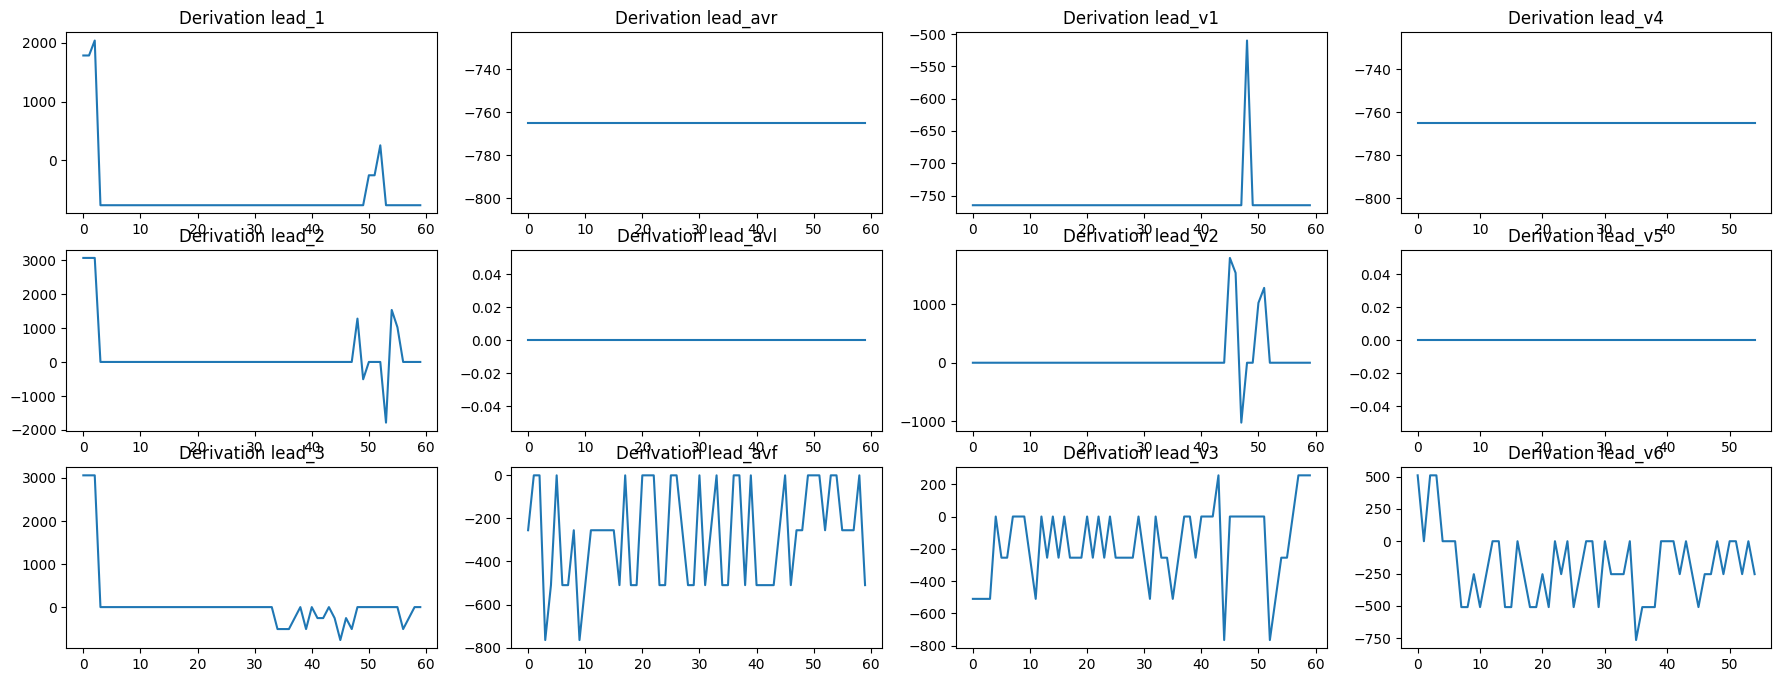

In [44]:
plot_data(vectors, "Derivation", 3, 4);